In [1]:
# run the header that sets up the environment

already_run = globals().get("already_run", False)
if not (already_run):
    print("Running the header")
    already_run = True
    %run header.ipynb

    load_packages()
    change_wordir()
    colors, colours = colourblind_palette()

#model = "explicit_PSI"
model = "QSSA_PSI"

m = load_model(model)

Running the header


Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.30.0

succesfully loaded QSSA_PSI :D


In [2]:
y0 = {'P700FA': 2.5,
    'P700pFAm': 0.0,
    'P700FAm': 0.0,
    'PC': 0,
    'Fd': 5.0,
    'ps2cs': 0.525}

In [3]:
s = Simulator(m)
s.initialise(y0)

In [4]:
pfd = 0
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = 1, steps = 2)

pfd = 500
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = 4, steps = 6)

<Axes: >

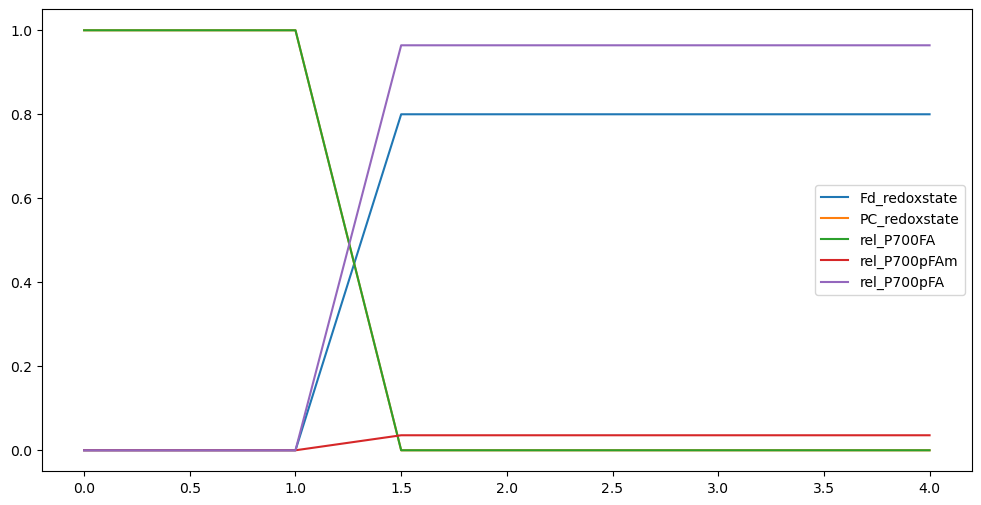

In [5]:
results = s.get_full_results_df()
results.loc[:,["Fd_redoxstate", "PC_redoxstate", "rel_P700FA", "rel_P700pFAm", "rel_P700pFA"]].plot(figsize=(12, 6))

In [6]:
results.loc[:,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA"]]
#results.loc[:,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA", "P700FAm"]]

,Fd,PC,P700FA,P700pFAm,P700pFA
0.0,5.0,0.0,2.500000e+00,0.000000,0.000000
0.5,5.0,0.0,2.500000e+00,0.000000,0.000000
1.0,5.0,0.0,2.500000e+00,0.000000,0.000000
1.5,1.0,4.0,-1.777177e-12,0.089376,2.410624
2.0,1.0,4.0,-1.217245e-14,0.089376,2.410624
2.5,1.0,4.0,0.000000e+00,0.089376,2.410624
3.0,1.0,4.0,0.000000e+00,0.089376,2.410624
3.5,1.0,4.0,0.000000e+00,0.089376,2.410624
4.0,1.0,4.0,0.000000e+00,0.089376,2.410624


In [7]:
# def electron_moeity(Fd, PC, P700FA, P700pFAm, P700FAm, P700pFA):
#     return (5-Fd)*1 + (4-PC)*1 + 1*P700FA + 1*P700pFAm + 1*P700FAm + 0*P700pFA

# electron_moeity(**dict(results.loc[4,["Fd", "PC", "P700FA", "P700pFAm", "P700FAm", "P700pFA"]]))


def electron_moeity(Fd, PC, P700FA, P700pFAm, P700pFA):
    return (5-Fd)*1 + (4-PC)*1 + 1*P700FA + 1*P700pFAm + 0*P700pFA

electron_moeity(**dict(results.loc[4,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA"]]))


np.float64(4.089375683049492)